In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
np.random.seed(42)
path = Path('../data/imgs')

In [4]:
bs = 64
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

In [5]:
learn = cnn_learner(data, models.densenet201, metrics=[accuracy, FBeta(average='macro')])

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /home/jupyter/.cache/torch/checkpoints/densenet201-c1103571.pth


In [6]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.330028,0.097077,0.973461,0.972185,04:43
1,0.121253,0.030155,0.991525,0.990843,02:58
2,0.067548,0.019893,0.993310,0.992822,02:57


In [7]:
learn.save('densenet201-stage-1')

In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


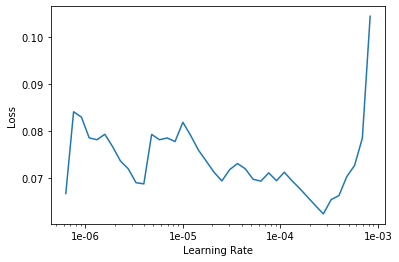

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(5, max_lr=slice(7e-5, 7e-4))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.106411,0.058112,0.983274,0.982286,03:28
1,0.084308,0.039874,0.987065,0.986840,03:29
2,0.049987,0.020968,0.993533,0.993238,03:28
3,0.013601,0.008518,0.997770,0.997734,03:28
4,0.006620,0.007244,0.998216,0.998144,03:28


In [12]:
learn.save('densenet201-stage-2')

In [15]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


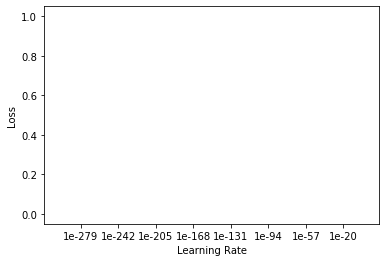

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, max_lr=slice(7e-5, 7e-4))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.026449,0.034606,0.989518,0.989410,03:29
1,0.049842,0.023524,0.993310,0.992933,03:28
2,0.021500,0.009831,0.997547,0.997415,03:29
3,0.005756,0.003116,0.998439,0.998315,03:28
4,0.003698,0.004074,0.998439,0.998457,03:29


In [18]:
learn.save('densenet201-stage-3')

In [19]:
learn.export()